# Technology shock - Further comments

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

C:\Users\nbk863\AppData\Local\Temp\ipykernel_9184\3413739869.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Setup

In [2]:
model = BabyMAKROModelClass(name='baseline') # create an instance of the model

In [3]:
par = model.par
ss = model.ss
paramesol = model.sol

In [4]:
par.t_b = 0
par.delta_B = 0

In [5]:
par_Psi = 'Psi_0'
par_Psi_values = [0.,5.0,25.0]
ModelList_Psi = model.multi_model(par_Psi,par_Psi_values)

Jacobian calculated in 1.0 mins 4 secs
Jacobian calculated in 26.4 secs
Jacobian calculated in 26.5 secs


In [6]:
par_eta= 'eta'
par_eta_values = [0.,0.1,0.3]
ModelList_eta = model.multi_model(par_eta,par_eta_values)

Jacobian calculated in 25.9 secs
Jacobian calculated in 25.9 secs
Jacobian calculated in 25.9 secs


## Find IRF

In [7]:
Tshock = 50
persistence = 0.80**np.arange(Tshock)

In [8]:
for i in range(len(ModelList_Psi)):
    ModelList_Psi[i].set_exo_ss()
    ModelList_Psi[i].set_unknowns_ss()

    ModelList_Psi[i].sol.Gamma[:Tshock] = ModelList_Psi[i].ss.Gamma*(1 + 0.01*persistence)

    ModelList_Psi[i].find_IRF()

initial:
t1-t0 = 0.01100 secs
it = 7
    max. abs. error = 3.67e-11
    3.50e-12 in A_R_ini_error
    4.80e-14 in Aq_diff
    2.05e-14 in FOC_capital_agency
    3.88e-12 in FOC_K_ell
    3.67e-11 in mkt_clearing
    7.17e-13 in PC

solve: t1-t0 = 0.08278 secs
evaluate + update: t3-t2 = 0.06596 secs
initial:
t1-t0 = 0.02394 secs
it = 7
    max. abs. error = 2.11e-11
    7.86e-13 in A_R_ini_error
    2.31e-14 in Aq_diff
    1.53e-13 in FOC_capital_agency
    9.05e-13 in FOC_K_ell
    2.11e-11 in mkt_clearing
    1.20e-13 in PC

solve: t1-t0 = 0.08178 secs
evaluate + update: t3-t2 = 0.06483 secs
initial:
t1-t0 = 0.02194 secs
it = 7
    max. abs. error = 5.81e-12
    2.48e-13 in A_R_ini_error
    5.33e-15 in Aq_diff
    7.66e-14 in FOC_capital_agency
    2.60e-13 in FOC_K_ell
    5.81e-12 in mkt_clearing
    4.90e-14 in PC

solve: t1-t0 = 0.08278 secs
evaluate + update: t3-t2 = 0.06383 secs


In [9]:
for i in range(len(ModelList_eta)):
    ModelList_eta[i].set_exo_ss()
    ModelList_eta[i].set_unknowns_ss()

    ModelList_eta[i].sol.Gamma[:Tshock] = ModelList_eta[i].ss.Gamma*(1 + 0.01*persistence)

    ModelList_eta[i].find_IRF()

initial:
t1-t0 = 0.01097 secs
it = 7
    max. abs. error = 8.19e-11
    3.21e-12 in A_R_ini_error
    5.24e-14 in Aq_diff
    4.50e-13 in FOC_capital_agency
    3.20e-12 in FOC_K_ell
    8.19e-11 in mkt_clearing
    4.80e-13 in PC

solve: t1-t0 = 0.08477 secs
evaluate + update: t3-t2 = 0.06682 secs
initial:
t1-t0 = 0.02493 secs
it = 7
    max. abs. error = 2.11e-11
    7.86e-13 in A_R_ini_error
    2.31e-14 in Aq_diff
    1.53e-13 in FOC_capital_agency
    9.05e-13 in FOC_K_ell
    2.11e-11 in mkt_clearing
    1.20e-13 in PC

solve: t1-t0 = 0.08378 secs
evaluate + update: t3-t2 = 0.06283 secs
initial:
t1-t0 = 0.02294 secs
it = 7
    max. abs. error = 6.12e-12
    2.16e-13 in A_R_ini_error
    7.55e-15 in Aq_diff
    2.26e-14 in FOC_capital_agency
    2.59e-13 in FOC_K_ell
    6.12e-12 in mkt_clearing
    3.59e-14 in PC

solve: t1-t0 = 0.08477 secs
evaluate + update: t3-t2 = 0.06483 secs


## Figures

### Sensitivity analysis wrt adjustment costs 

#### Production firms

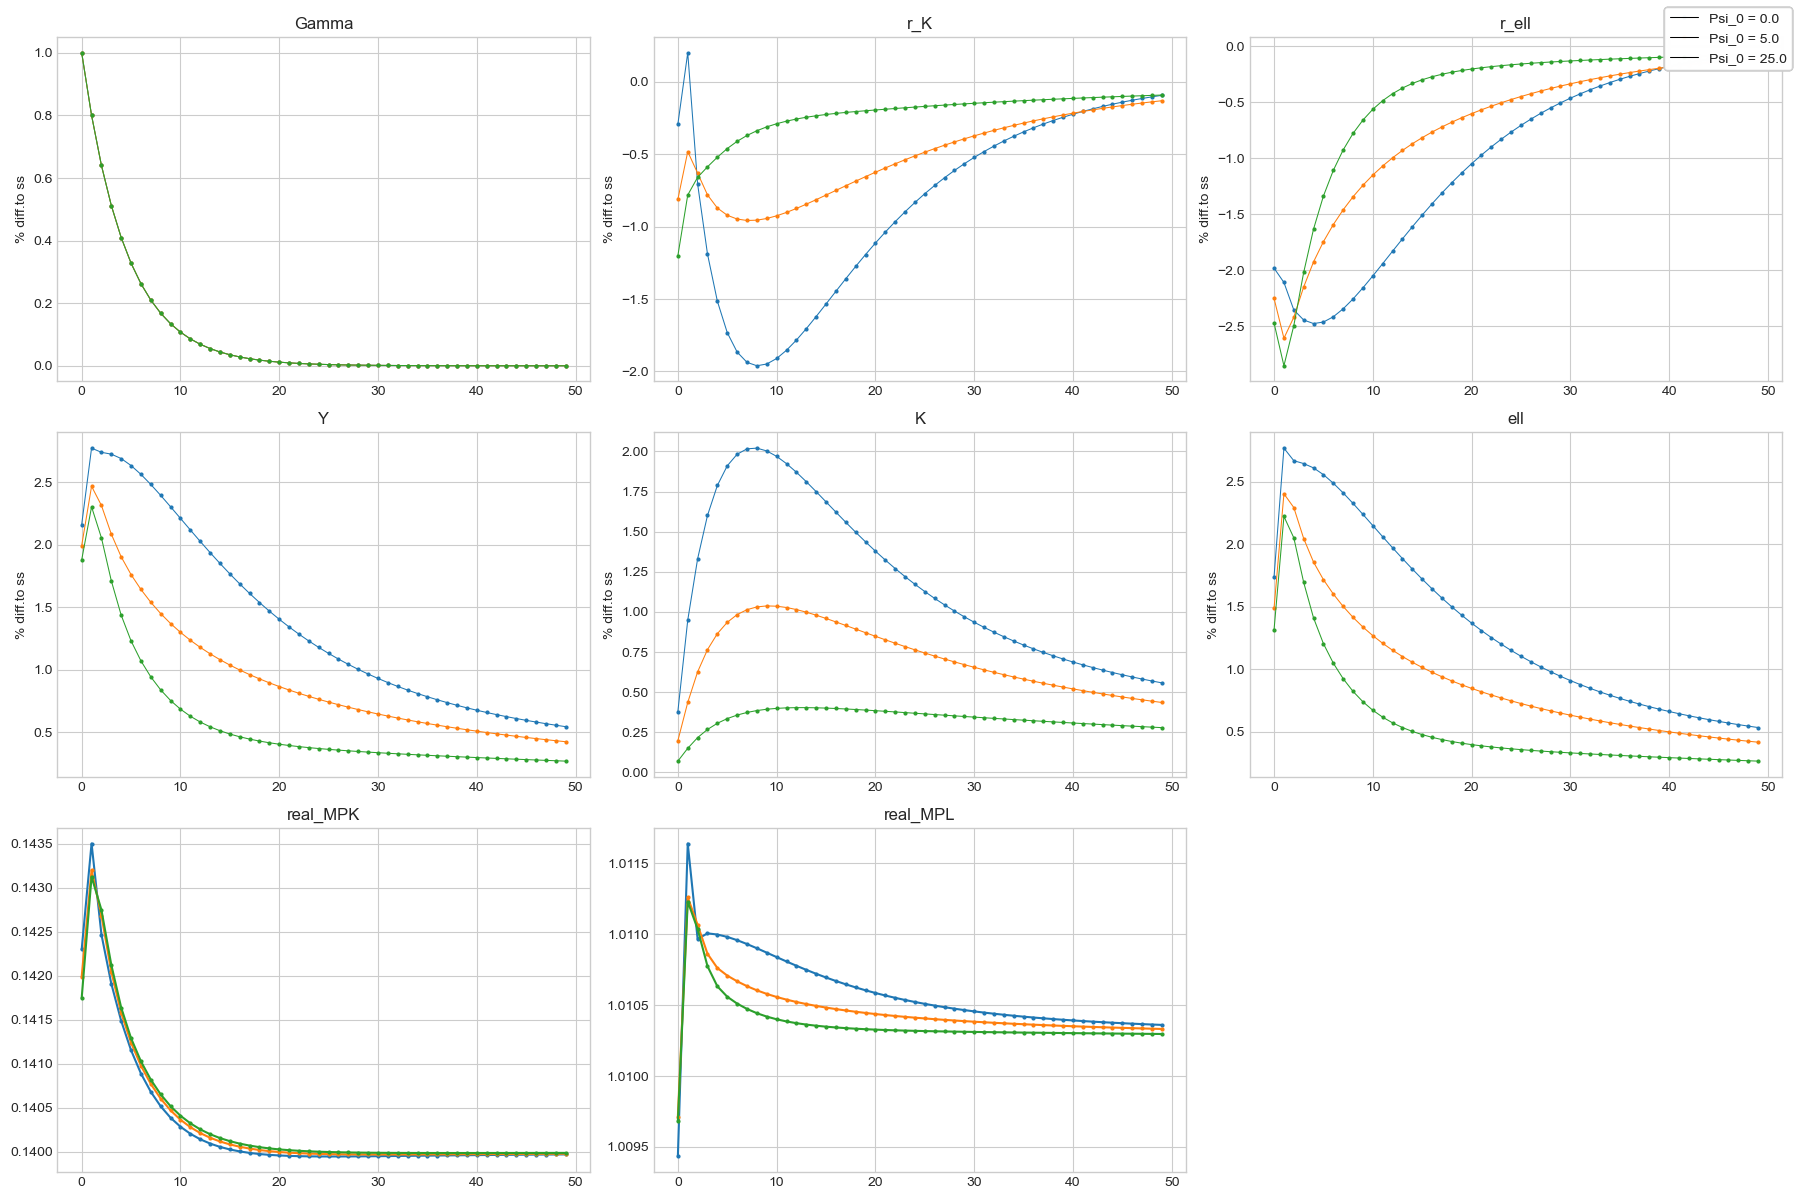

In [10]:
model.plot_IRF_models(ModelList_Psi,varlist=['Gamma','r_K','r_ell','Y','K','ell','real_MPK','real_MPL'],ncol=3, abs=['real_MPK','real_MPL'],parameter=par_Psi,parvalues=par_Psi_values)

#### Phillips-curve

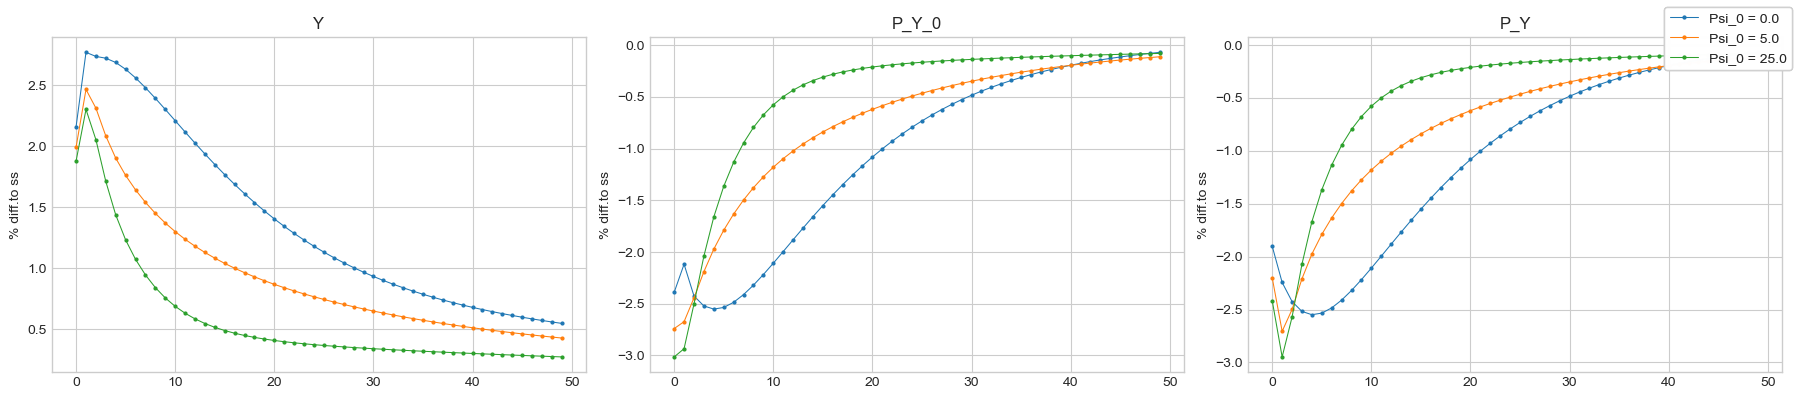

In [11]:
model.plot_IRF_models(ModelList_Psi,varlist=['Y','P_Y_0','P_Y'],ncol=3,parameter=par_Psi,parvalues=par_Psi_values)

#### Investments

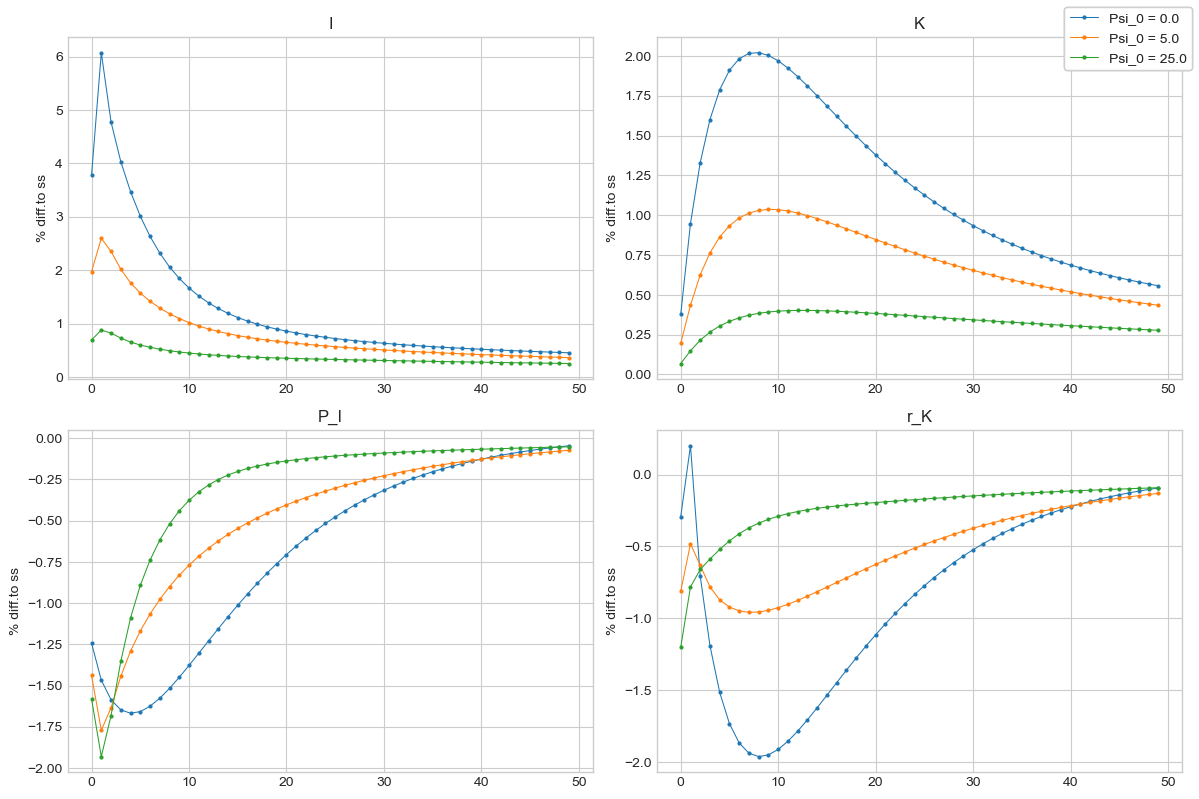

In [12]:
model.plot_IRF_models(ModelList_Psi,varlist=['I','K','P_I','r_K'],ncol=2,parameter=par_Psi,parvalues=par_Psi_values)

### Sensitivity analysis wrt price-flexibility

#### Production firms

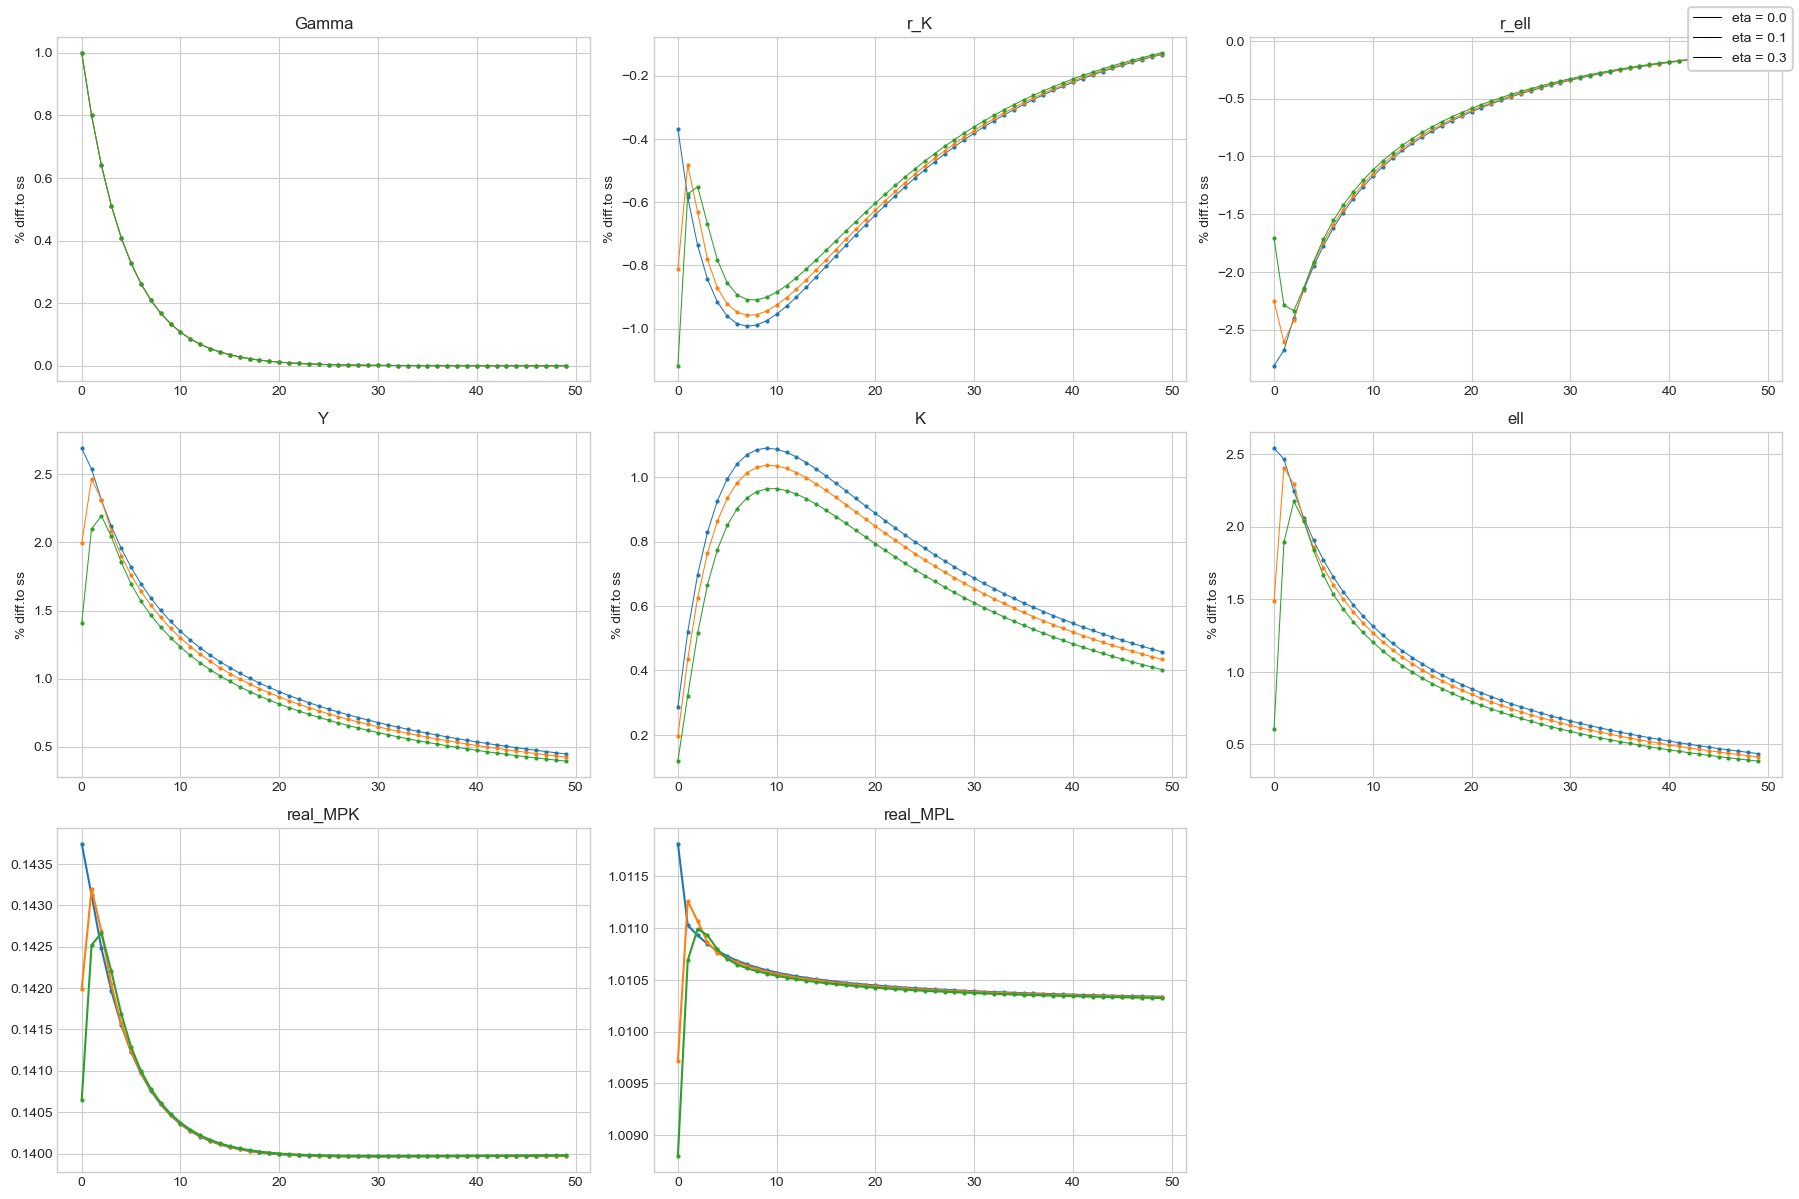

In [13]:
model.plot_IRF_models(ModelList_eta,varlist=['Gamma','r_K','r_ell','Y','K','ell','real_MPK','real_MPL'],ncol=3, abs=['real_MPK','real_MPL'],parameter=par_eta,parvalues=par_eta_values)

#### Phillips-curve

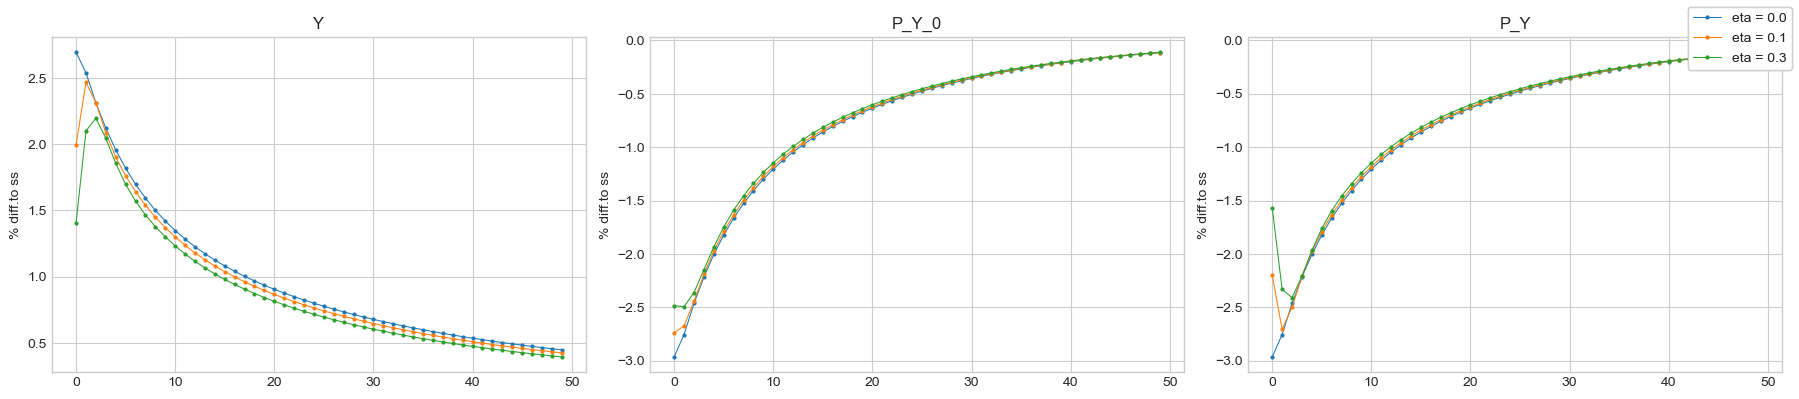

In [14]:
model.plot_IRF_models(ModelList_eta,varlist=['Y','P_Y_0','P_Y'],ncol=3,parameter=par_eta,parvalues=par_eta_values)

#### Investments

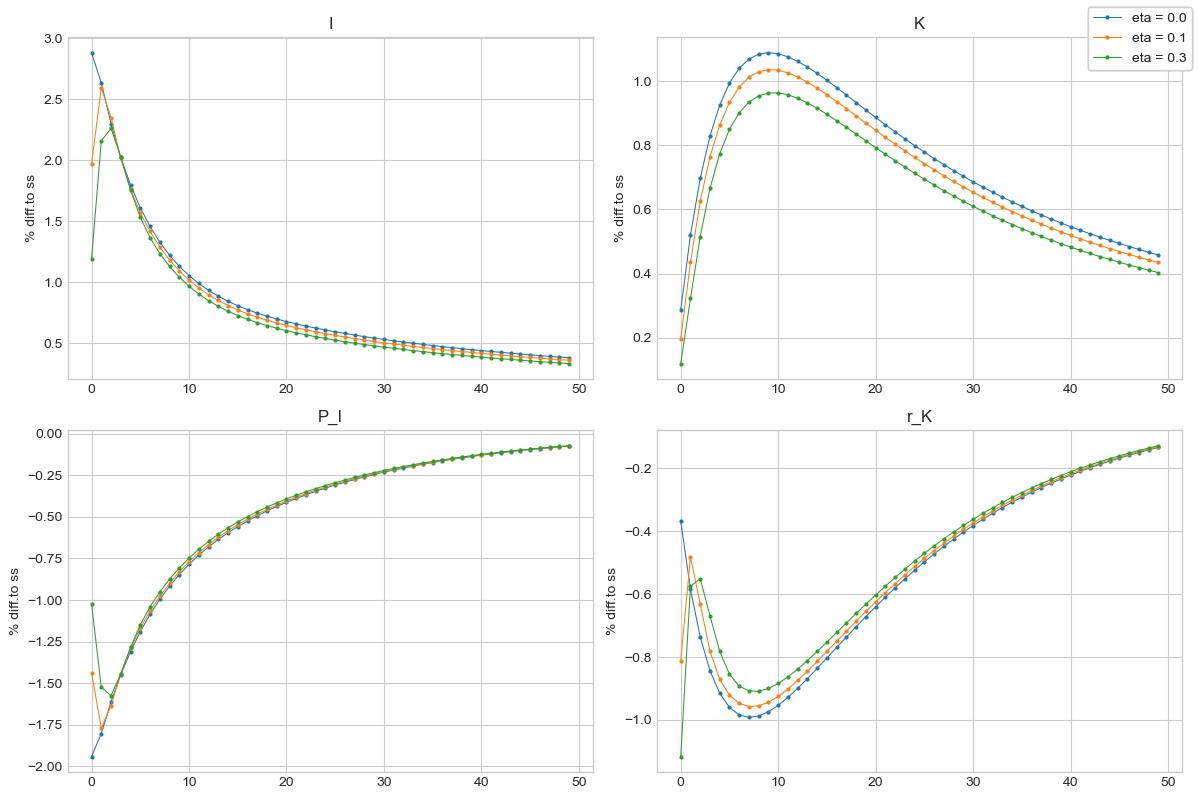

In [15]:
model.plot_IRF_models(ModelList_eta,varlist=['I','K','P_I','r_K'],ncol=2,parameter=par_eta,parvalues=par_eta_values)